## Data Analysis on MAANG companies stock data

Visualizations using **Seaborn**

Preprocessed data: data/processed/maang_combined.csv

original data by SOUMENDRA PRASAD MOHANTY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [2]:
# import data
data = pd.read_csv('data/processed/maang_combined.csv')
data.head(3)

,Open,High,Low,Close,Volume,Date,Company,Close_minmax,Close_indexed
0,58.687500,59.312500,56.000000,36.361576,53228400,2000-01-03,Microsoft,0.076244,1.0
1,0.936384,1.004464,0.907924,0.850643,535796800,2000-01-03,Apple,0.003608,1.0
2,4.075000,4.478125,3.952344,4.468750,322352000,2000-01-03,Amazon,0.022388,1.0


In [3]:
# set Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
# example of separated dataframe
aapl_df = data[data["Company"] == "Apple"]
aapl_df.head(3)

,Open,High,Low,Close,Volume,Date,Company,Close_minmax,Close_indexed
1,0.936384,1.004464,0.907924,0.850643,535796800,2000-01-03,Apple,0.003608,1.00000
5,0.966518,0.987723,0.903460,0.778926,512377600,2000-01-04,Apple,0.003211,0.91569
6,0.926339,0.987165,0.919643,0.790324,778321600,2000-01-05,Apple,0.003274,0.92909


In [6]:
# check for missing values
data.isna().any().any()

np.False_

### Closing prices (not normalized)

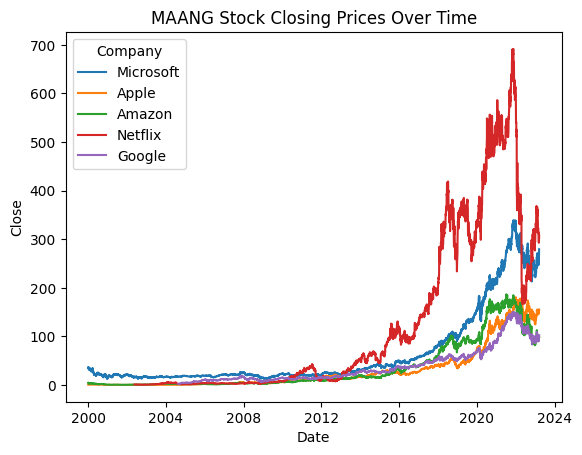

In [7]:
# simple line plot (Close)
sns.lineplot(data=data, x="Date", y="Close", hue="Company")
plt.title("MAANG Stock Closing Prices Over Time")
plt.show()

In [8]:
# company stock close price correlation matrix
pivoted_data = data.pivot(index="Date", columns="Company", values="Close")
pivoted_data.corr()

Company,Amazon,Apple,Google,Microsoft,Netflix
Company,,,,,
Amazon,1.000000,0.938051,0.955467,0.958196,0.970675
Apple,0.938051,1.000000,0.970715,0.986915,0.858666
Google,0.955467,0.970715,1.000000,0.979899,0.900185
Microsoft,0.958196,0.986915,0.979899,1.000000,0.897905
Netflix,0.970675,0.858666,0.900185,0.897905,1.000000


In [9]:
# average closing price per company
data.groupby("Company")["Close"].mean()

Company
Amazon        34.853440
Apple         29.763246
Google        38.265822
Microsoft     63.714342
Netflix      122.090193
Name: Close, dtype: float64

### Normalized Close

Min-max: patterns -> how does the price behave compared to itself

Indexed: performance overtime -> company comparison, comparison overtime, growth from first date

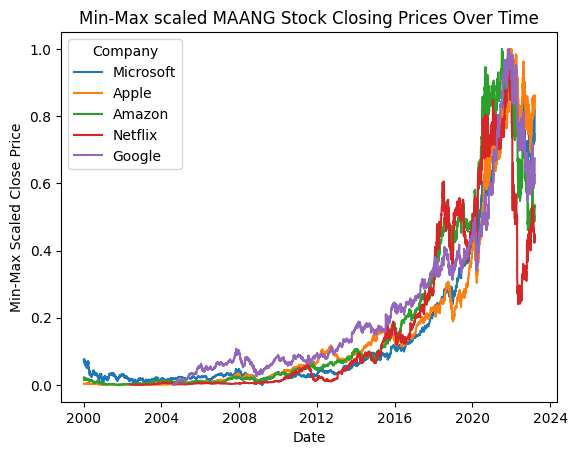

In [12]:
# min-max line plot 
sns.lineplot(data=data, x="Date", y="Close_minmax", hue="Company")
plt.title("Min-Max scaled MAANG Stock Closing Prices Over Time")
plt.ylabel("Min-Max Scaled Close Price")
plt.show()

### Volume

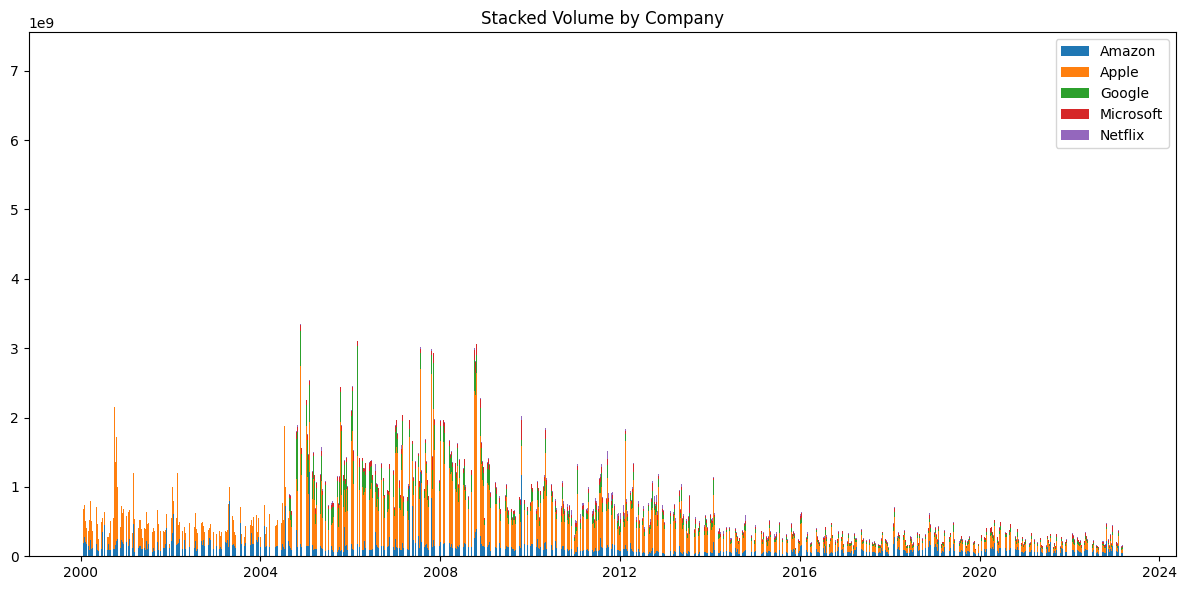

In [10]:
# matplotlib stacked barchart combined with seaborn styling
# barchart, last 1000 data points

# pivot so each company becomes its own column
df_pivot = data.pivot_table(
    index="Date",
    columns="Company",
    values="Volume",
    aggfunc="sum"
)

# choose seaborn palette
palette = sns.color_palette("tab10", len(df_pivot.columns))

plt.figure(figsize=(12, 6))

bottom = None

for (company, color) in zip(df_pivot.columns, palette):
    plt.bar(
        df_pivot.index,
        df_pivot[company],
        bottom=bottom,
        label=company,
        color=color
    )
    # update bottom for stacking
    bottom = (
        df_pivot[company] if bottom is None
        else bottom + df_pivot[company]
    )

plt.title("Stacked Volume by Company")
plt.legend()
plt.tight_layout()
plt.show()